In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy

import pickle

print(os.getcwd())
if os.getcwd().split("/")[-1] == "Covid_19_predictor":
  print("Current working directory is already Covid_19_predictor")
elif os.path.isdir("Covid_19_predictor"):
  print("Covid_19_predictor already Exists")
else:
  ! git clone https://github.com/saahil-jain/Covid_19_predictor.git

/content
Covid_19_predictor already Exists


In [2]:
if os.path.isdir("Covid_19_predictor"):
  % cd Covid_19_predictor
! git pull

/content/Covid_19_predictor
Already up to date.


In [3]:
df = pd.read_csv("data.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


In [0]:
grouped = df.groupby('countriesAndTerritories')
countries = sorted(list(set(df.countriesAndTerritories.unique())))
country_population = {}
for country in countries:
  country_population[country] = set(grouped.get_group(country)['popData2018'])
countries_to_remove = ["Cases_on_an_international_conveyance_Japan", "Holy_See"]
for country in countries:
  if len(country_population[country])>1 :
    countries_to_remove.append(country)
for country in countries_to_remove:
  del country_population[country]
  countries.remove(country)

country_population = {}
for country in countries:
  country_population[country] = list(grouped.get_group(country)['popData2018'])[0]

In [0]:
country_wise_cases = dict()
country_wise_deaths = dict()
normalised_country_wise_cases = dict()
normalised_country_wise_deaths = dict()
for country in countries:
  country_wise_cases[country] = list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country] = list(grouped.get_group(country)['deaths'])[::-1]
for country in countries:
  for index in range(len(country_wise_cases[country])):
    country_wise_cases[country][index] = abs(country_wise_cases[country][index])
    country_wise_deaths[country][index] = abs(country_wise_deaths[country][index])

for country in countries:
  leading_zero_count = 0
  for index in range(len(country_wise_cases[country])):
    if country_wise_cases[country][index] == 0:
      leading_zero_count += 1
    else:
      country_wise_cases[country] = country_wise_cases[country][leading_zero_count:]
      country_wise_deaths[country] = country_wise_deaths[country][leading_zero_count:]
      break

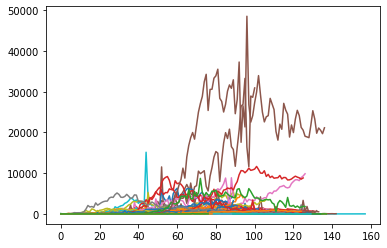

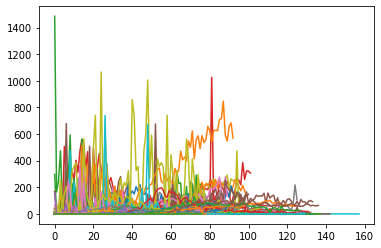

In [6]:
for country in countries:
  graph = plt.plot(country_wise_cases[country])
plt.show()

for country in countries:
  normalised_country_wise_cases[country] = deepcopy(country_wise_cases[country])
  for index in range(len(country_wise_cases[country])):
    normalised_country_wise_cases[country][index] = normalised_country_wise_cases[country][index] * 1_000_000 / country_population[country]
  graph=plt.plot(normalised_country_wise_cases[country])
plt.show()

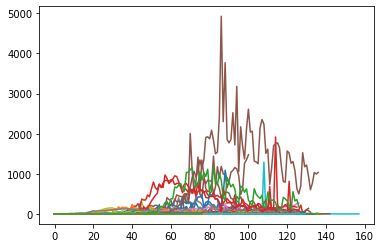

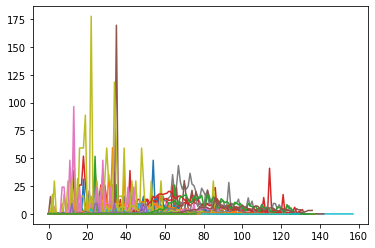

In [7]:
for country in countries:
  graph = plt.plot(country_wise_deaths[country])
plt.show()

for country in countries:
  normalised_country_wise_deaths[country] = deepcopy(country_wise_deaths[country])
  for index in range(len((country_wise_deaths[country]))):
    normalised_country_wise_deaths[country][index] = normalised_country_wise_deaths[country][index] * 1_000_000 / country_population[country]
  graph = plt.plot(normalised_country_wise_deaths[country])
plt.show()

In [0]:
cumulative_country_wise_cases = dict()
cumulative_country_wise_deaths = dict()
normalised_cumulative_country_wise_cases = dict()
normalised_cumulative_country_wise_deaths = dict()

for country in countries:
  cumulative_country_wise_cases[country] = []
  cumulative_country_wise_deaths[country] = []
  cumulative_cases = 0
  cumulative_death = 0
  normalised_cumulative_country_wise_cases[country] = []
  normalised_cumulative_country_wise_deaths[country] = []
  normalised_cumulative_cases = 0
  normalised_cumulative_death = 0
  total_days = len(country_wise_cases[country])
  for index in range(total_days):
    cumulative_cases += country_wise_cases[country][index]
    cumulative_death += country_wise_deaths[country][index]
    cumulative_country_wise_cases[country].append(cumulative_cases)
    cumulative_country_wise_deaths[country].append(cumulative_death)
    normalised_cumulative_cases += normalised_country_wise_cases[country][index]
    normalised_cumulative_death += normalised_country_wise_deaths[country][index]
    normalised_cumulative_country_wise_cases[country].append(normalised_cumulative_cases)
    normalised_cumulative_country_wise_deaths[country].append(normalised_cumulative_death)

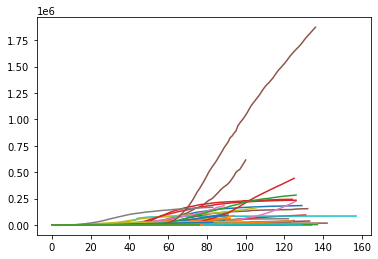

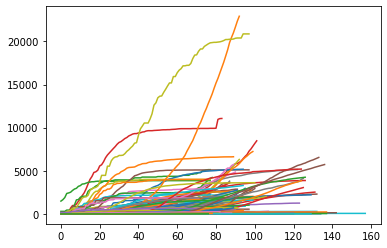

In [9]:
for country in countries:
  graph = plt.plot(cumulative_country_wise_cases[country])
plt.show()

for country in countries:
  graph = plt.plot(normalised_cumulative_country_wise_cases[country])
plt.show()

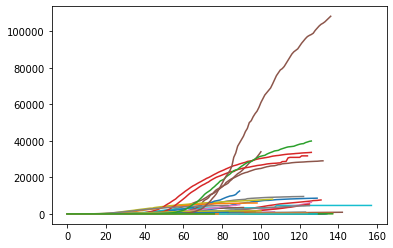

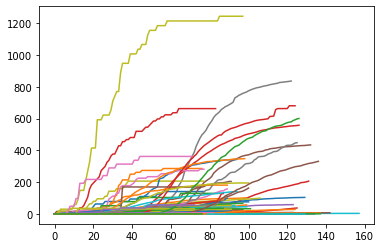

In [10]:
for country in countries:
  graph = plt.plot(cumulative_country_wise_deaths[country])
plt.show()

for country in countries:
  graph = plt.plot(normalised_cumulative_country_wise_deaths[country])
plt.show()

In [11]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cumulative_country_wise_cases[country][-1]),"{0:10d}".format(cumulative_country_wise_deaths[country][-1]))

Afghanistan                                        18054        300
Albania                                             1197         33
Algeria                                             9831        681
Andorra                                              852         51
Angola                                                86          4
Antigua_and_Barbuda                                   26          3
Argentina                                          19255        588
Armenia                                            11221        176
Aruba                                                101          3
Australia                                           7240        102
Austria                                            16741        670
Azerbaijan                                          6522         78
Bahamas                                              102         11
Bahrain                                            13296         21
Bangladesh                                      

In [12]:
top_n = 10
countries_and_cases=[]
countries_and_deaths=[]

for country, cumulative_cases in zip(cumulative_country_wise_cases.keys(), cumulative_country_wise_cases.values()):
  countries_and_cases.append([country, cumulative_cases[-1]])
countries_and_cases = sorted(countries_and_cases,key = lambda x:x[1],reverse=True)
top_n_cases = list(map(lambda x:x[0], countries_and_cases))[:top_n]

for country, cumulative_deaths in zip(cumulative_country_wise_deaths.keys(), cumulative_country_wise_deaths.values()):
  countries_and_deaths.append([country, cumulative_deaths[-1]])
countries_and_deaths = sorted(countries_and_deaths, key = lambda x:x[1], reverse = True)

top_n_deaths = list(map(lambda x:x[0],countries_and_deaths))[:top_n]

print("{0:45s}".format("Total Cases"), "{0:45s}".format("Total Deaths"), end="\n\n")
for index in range(top_n):
  print("{0:45s}".format(top_n_cases[index]), "{0:45s}".format(top_n_deaths[index])) 

Total Cases                                   Total Deaths                                 

United_States_of_America                      United_States_of_America                     
Brazil                                        United_Kingdom                               
Russia                                        Brazil                                       
United_Kingdom                                Italy                                        
Spain                                         Spain                                        
Italy                                         France                                       
India                                         Mexico                                       
Germany                                       Belgium                                      
Peru                                          Germany                                      
Turkey                                        Iran                             

In [13]:
def intersection(lst1, lst2): 
  return list(set(lst1) & set(lst2)) 
training_countries = list(intersection(top_n_cases, top_n_deaths))
print(training_countries)

['Spain', 'United_States_of_America', 'Germany', 'United_Kingdom', 'Brazil', 'Italy']


In [14]:
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [0]:
def return_rmse(test,predicted):
  rmse = math.sqrt(mean_squared_error(test, predicted))
  print("The root mean squared error is {}.".format(rmse))

In [0]:
base_data_cases = normalised_country_wise_cases
base_data_deaths = normalised_country_wise_deaths

def split(dataframe, split_factor):
  base_data = {}
  for country in training_countries:
    base_data[country] = {}
    country_data_length = len(dataframe[country])
    split_index = int(math.floor(country_data_length * split_factor))
    base_data[country]["Train"] = dataframe[country][:split_index]
    base_data[country]["Test"] = dataframe[country][split_index:]
  return base_data

split_factor = 0.8

transform_train_cases = {}
transform_test_cases = {}
scaler_cases = {}
data_cases = split(base_data_cases, split_factor)
for num, country in enumerate(training_countries):
  sc = MinMaxScaler(feature_range=(0,1))
  a0 = np.array(data_cases[country]["Train"])
  a1 = np.array(data_cases[country]["Test"])
  a0 = a0.reshape(a0.shape[0],1)
  a1 = a1.reshape(a1.shape[0],1)
  transform_train_cases[country] = sc.fit_transform(a0)
  transform_test_cases[country] = sc.fit_transform(a1)
  scaler_cases[country] = sc
del a0
del a1

transform_train_deaths = {}
transform_test_deaths = {}
scaler_deaths = {}
data_deaths = split(base_data_deaths, split_factor)
for num, country in enumerate(training_countries):
  sc = MinMaxScaler(feature_range=(0,1))
  a0 = np.array(data_deaths[country]["Train"])
  a1 = np.array(data_deaths[country]["Test"])
  a0 = a0.reshape(a0.shape[0],1)
  a1 = a1.reshape(a1.shape[0],1)
  transform_train_deaths[country] = sc.fit_transform(a0)
  transform_test_deaths[country] = sc.fit_transform(a1)
  scaler_deaths[country] = sc
del a0
del a1

In [17]:
for i in transform_train_cases.keys():
    print(i, transform_train_cases[i].shape)
print("\n")    
for i in transform_test_cases.keys():
    print(i, transform_test_cases[i].shape)
 
print("\n")    
for i in transform_train_deaths.keys():
    print(i, transform_train_deaths[i].shape)
print("\n")    
for i in transform_test_deaths.keys():
    print(i, transform_test_deaths[i].shape)

Spain (100, 1)
United_States_of_America (109, 1)
Germany (104, 1)
United_Kingdom (101, 1)
Brazil (80, 1)
Italy (101, 1)


Spain (25, 1)
United_States_of_America (28, 1)
Germany (26, 1)
United_Kingdom (26, 1)
Brazil (21, 1)
Italy (26, 1)


Spain (100, 1)
United_States_of_America (109, 1)
Germany (104, 1)
United_Kingdom (101, 1)
Brazil (80, 1)
Italy (101, 1)


Spain (25, 1)
United_States_of_America (28, 1)
Germany (26, 1)
United_Kingdom (26, 1)
Brazil (21, 1)
Italy (26, 1)


In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 3
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
      X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
      y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_cases[country]["y"] = y_train
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
      X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
      y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_cases[country]["y"] = y_test

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 3
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
      X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
      y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_deaths[country]["y"] = y_train
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
      X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
      y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_deaths[country]["y"] = y_test

In [19]:
arr_buff_cases = []
for country in training_countries:
  buff = {}
  buff["X_train"] = trainset_cases[country]["X"].shape
  buff["y_train"] = trainset_cases[country]["y"].shape
  buff["X_test"] = testset_cases[country]["X"].shape
  buff["y_test"] = testset_cases[country]["y"].shape
  arr_buff_cases.append(buff)

pd.DataFrame(arr_buff_cases, index=training_countries)

,X_train,y_train,X_test,y_test
Spain,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
United_States_of_America,"(106, 3, 1)","(106,)","(25, 3, 1)","(25,)"
Germany,"(101, 3, 1)","(101,)","(23, 3, 1)","(23,)"
United_Kingdom,"(98, 3, 1)","(98,)","(23, 3, 1)","(23,)"
Brazil,"(77, 3, 1)","(77,)","(18, 3, 1)","(18,)"
Italy,"(98, 3, 1)","(98,)","(23, 3, 1)","(23,)"


In [20]:
arr_buff_deaths = []
for country in training_countries:
  buff = {}
  buff["X_train"] = trainset_deaths[country]["X"].shape
  buff["y_train"] = trainset_deaths[country]["y"].shape
  buff["X_test"] = testset_deaths[country]["X"].shape
  buff["y_test"] = testset_deaths[country]["y"].shape
  arr_buff_deaths.append(buff)

pd.DataFrame(arr_buff_deaths, index=training_countries)

,X_train,y_train,X_test,y_test
Spain,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
United_States_of_America,"(106, 3, 1)","(106,)","(25, 3, 1)","(25,)"
Germany,"(101, 3, 1)","(101,)","(23, 3, 1)","(23,)"
United_Kingdom,"(98, 3, 1)","(98,)","(23, 3, 1)","(23,)"
Brazil,"(77, 3, 1)","(77,)","(18, 3, 1)","(18,)"
Italy,"(98, 3, 1)","(98,)","(23, 3, 1)","(23,)"


In [0]:
total_error = dict()
total_error["Cases"] = 0
total_error["Deaths"] = 0
  
def lagging(df, lag):
  df_pred = pd.Series(df["Pred"].reshape(-1))
  df_true = pd.Series(df["True"].reshape(-1))
   
  df_pred_lag = df_pred.shift(lag)
    
  MSE_lag = mean_squared_error(np.array(df_true[:-lag]), np.array(df_pred_lag[:-lag]))
  print("MSE with Lag    :", MSE_lag)

  plt.figure(figsize=(14,4))
  plt.title("Prediction with Lag")
  plt.plot(df_true, color='green')
  plt.plot(df_pred_lag, color='blue')
  plt.legend(["True", "Predicted"])

  return MSE_lag

In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 1
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = X_train
    trainset_cases[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = X_test
    testset_cases[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 1
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = X_train
    trainset_deaths[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = X_test
    testset_deaths[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR, MultiStepLR

In [0]:
class arguments:
  def __init__(self):
    self.batch_size=64
    self.test_batch_size=1000
    self.epochs=15
    self.lr=0.01
    self.gamma=0.7
    self.seed=1
    self.log_interval=5
    
args=arguments()
device = torch.device("cpu")

In [0]:
trainset_cases_pre = {}
testset_cases_pre = {}
trainset_deaths_pre = {}
testset_deaths_pre = {}
for country in training_countries:
    trainset_cases_pre[country] = {}
    testset_cases_pre[country] = {}
    trainset_deaths_pre[country] = {}
    testset_deaths_pre[country] = {}
for country in training_countries:
  for x_or_y in ["X","y"]:
    trainset_cases_pre[country][x_or_y]=np.float32(trainset_cases[country][x_or_y])
    testset_cases_pre[country][x_or_y]=np.float32(testset_cases[country][x_or_y])

    trainset_deaths_pre[country][x_or_y]=np.float32(trainset_deaths[country][x_or_y])
    testset_deaths_pre[country][x_or_y]=np.float32(testset_deaths[country][x_or_y])
trainset = dict()
testset = dict()
for country in training_countries:
  trainset_cases[country] = torch.utils.data.DataLoader((trainset_cases_pre[country]["X"], trainset_cases_pre[country]["y"]), batch_size=10, shuffle=False)
  testset_cases[country] = torch.utils.data.DataLoader((testset_cases_pre[country]["X"], testset_cases_pre[country]["y"]), batch_size=10, shuffle=False)
  trainset_deaths[country] = torch.utils.data.DataLoader((trainset_deaths_pre[country]["X"], trainset_deaths_pre[country]["y"]), batch_size=10, shuffle=False)
  testset_deaths[country] = torch.utils.data.DataLoader((testset_deaths_pre[country]["X"], testset_deaths_pre[country]["y"]), batch_size=10, shuffle=False)

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 256)
        self.fc5 = nn.Linear(256, 256)
        self.fc6 = nn.Linear(256, 128)
        self.fc7 = nn.Linear(128, 64)
        self.fc8 = nn.Linear(64, 64)
        self.fc9 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return x


Train Epoch: 0
Spain                                         0.13379471004009247
United_States_of_America                      0.0903124213218689
Germany                                       0.18222300708293915
United_Kingdom                                0.0735124871134758
Brazil                                        0.057210855185985565
Italy                                         0.12462034821510315

Train Epoch: 1
Spain                                         0.09280319511890411
United_States_of_America                      0.08726675063371658
Germany                                       0.10513807833194733
United_Kingdom                                0.07664164900779724
Brazil                                        0.056033581495285034
Italy                                         0.1013369932770729

Train Epoch: 2
Spain                                         0.0784883052110672
United_States_of_America                      0.07329251617193222
Germany                       

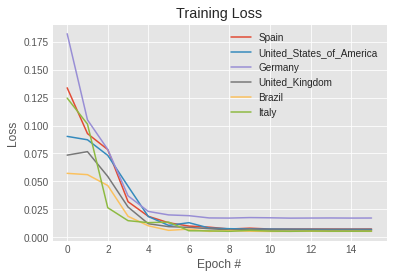

In [27]:
%%time
#normal NN training
loss_function = nn.MSELoss()
history_NN_cases = {}
for country in training_countries:
  history_NN_cases[country] = []
model_NN_cases = Net().to(device)
optimizer = optim.Adam(model_NN_cases.parameters(), lr=0.01)

epochs = 16

for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
        for (x,y) in enumerate(trainset_cases[country]):
            data = y[0]
            target = y[1]
            model_NN_cases.zero_grad()
            output = model_NN_cases(data)
            loss=loss_function(target,output)
            loss.backward()
            optimizer.step()
        print("{0:45s}".format(country), loss.item()) 
        history_NN_cases[country].append(loss.item())

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_NN_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

MSE with Lag    : 1.0052196
MSE with Lag    : 2.3953013
MSE with Lag    : 1.0275925
MSE with Lag    : 27.853739
MSE with Lag    : 14.813912
MSE with Lag    : 0.4516275


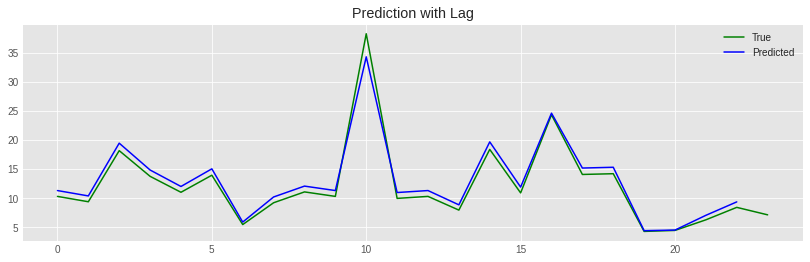

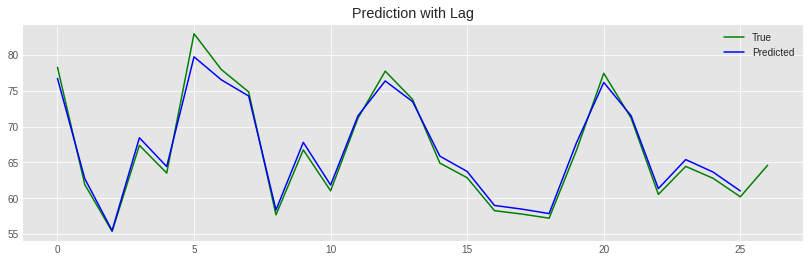

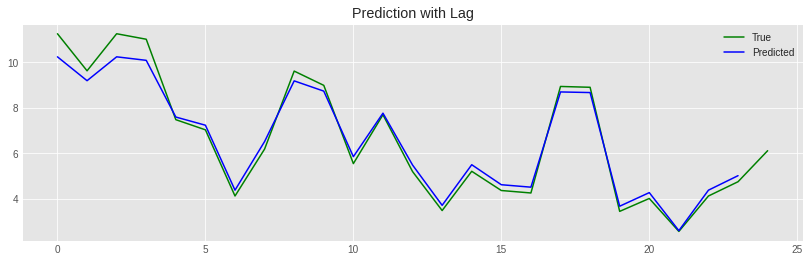

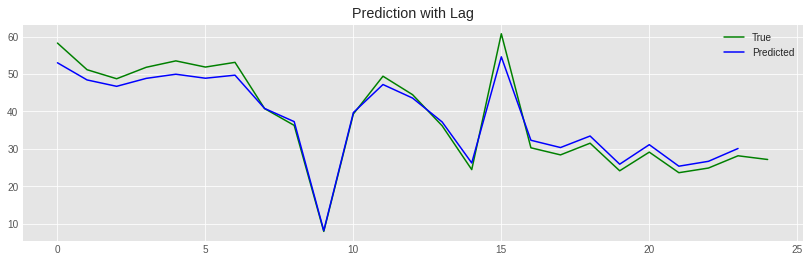

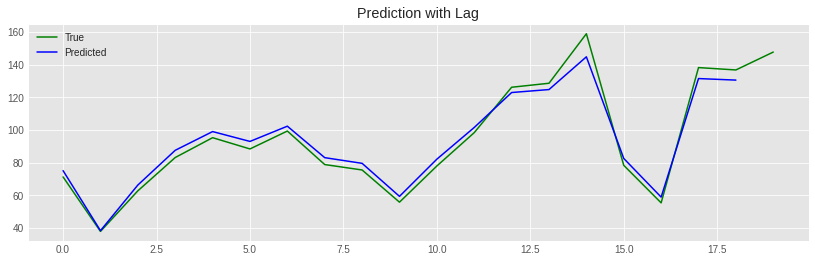

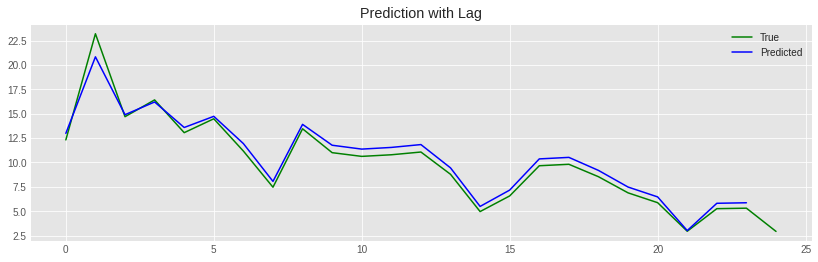

In [28]:
pred_result_cases = {}

for country in training_countries:
    output = 0
    for (x,y) in enumerate(testset_cases[country]):
      data = y[0]
      target = y[1]
      model_NN_cases.zero_grad()
      output = model_NN_cases(data)
      output = output.detach().numpy()
    y_true = scaler_cases[country].inverse_transform(testset_cases_pre[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(output)
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred

total_error["Cases"] = 0
for country in training_countries:
  total_error["Cases"] += lagging(pred_result_cases[country], -1)


Train Epoch: 0
Spain                                         0.200789213180542
United_States_of_America                      0.042949654161930084
Germany                                       0.08707328140735626
United_Kingdom                                0.08882731199264526
Brazil                                        0.08278333395719528
Italy                                         0.0832347571849823

Train Epoch: 1
Spain                                         0.10252547264099121
United_States_of_America                      0.03855004906654358
Germany                                       0.07045739889144897
United_Kingdom                                0.05669355019927025
Brazil                                        0.033445410430431366
Italy                                         0.04085953161120415

Train Epoch: 2
Spain                                         0.036132778972387314
United_States_of_America                      0.032647356390953064
Germany                    

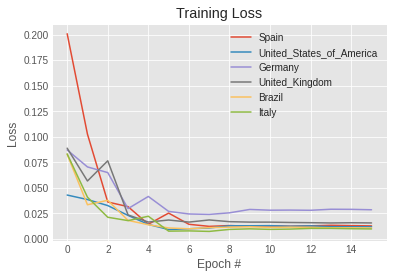

In [29]:
%%time
#normal NN training
loss_function = nn.MSELoss()
history_NN_deaths = {}
for country in training_countries:
  history_NN_deaths[country] = []
model_NN_deaths = Net().to(device)
optimizer = optim.Adam(model_NN_deaths.parameters(), lr=0.01)

for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
        for (x,y) in enumerate(trainset_deaths[country]):
            data = y[0]
            target = y[1]
            model_NN_deaths.zero_grad()
            output = model_NN_deaths(data)
            loss=loss_function(target,output)
            loss.backward()
            optimizer.step()
        print("{0:45s}".format(country), loss.item())
        history_NN_deaths[country].append(loss.item())

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_NN_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

MSE with Lag    : 2.0130742
MSE with Lag    : 0.27890775
MSE with Lag    : 0.059534002
MSE with Lag    : 0.1367209
MSE with Lag    : 0.032748226
MSE with Lag    : 0.017842526


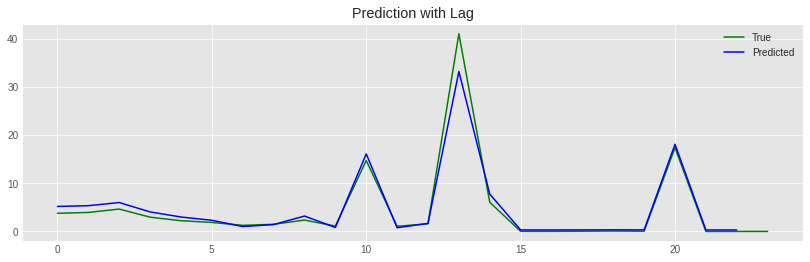

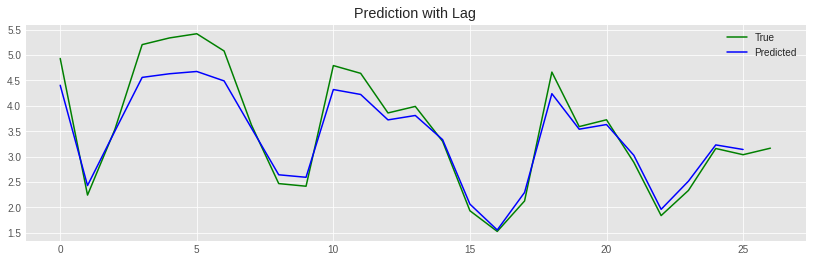

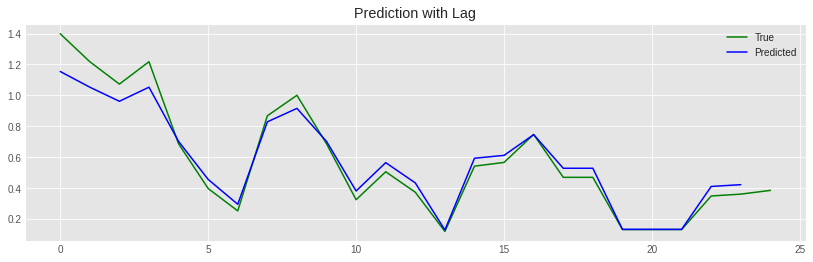

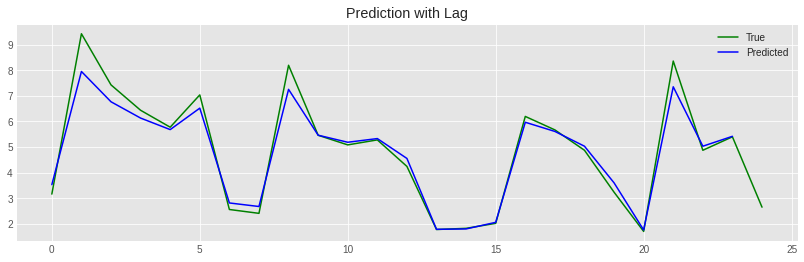

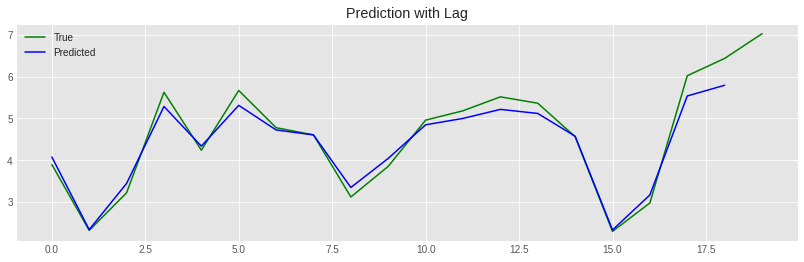

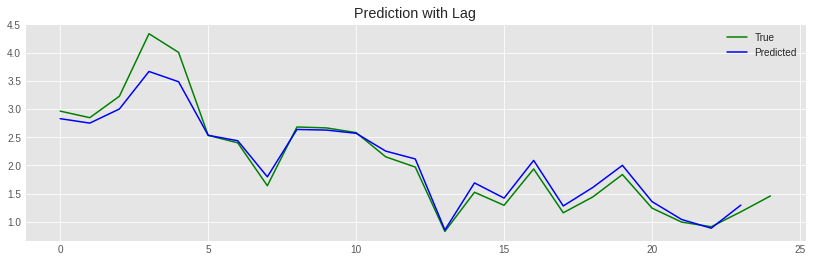

In [30]:
pred_result_deaths = {}

for country in training_countries:
    output = 0
    for (x,y) in enumerate(testset_deaths[country]):
            data = y[0]
            target = y[1]
            model_NN_deaths.zero_grad()
            output = model_NN_deaths(data)
            output = output.detach().numpy()
    y_true = scaler_deaths[country].inverse_transform(testset_deaths_pre[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(output)
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
total_error["Deaths"] = 0
for country in training_countries:
  total_error["Deaths"] += lagging(pred_result_deaths[country], -1)

In [0]:
torch.save(model_NN_cases.state_dict(), 'NNcases.pth.tar')
torch.save(model_NN_deaths.state_dict(), 'NNdeaths.pth.tar')

In [32]:
print(total_error)

{'Cases': 47.54739212989807, 'Deaths': 2.5388275552541018}


In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
df_latest = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data.csv')
df_latest.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,12-06-2020,12,6,2020,747,21,Afghanistan,AF,AFG,37172386.0,Asia
1,11-06-2020,11,6,2020,684,21,Afghanistan,AF,AFG,37172386.0,Asia
2,10-06-2020,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
3,09-06-2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
4,08-06-2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia


In [35]:
NN_cases = Net().to(device)
FILE = torch.load('NNcases.pth.tar')
NN_cases.load_state_dict(FILE)

NN_deaths = Net().to(device)
FILE = torch.load('NNdeaths.pth.tar')
NN_deaths.load_state_dict(FILE)

<All keys matched successfully>

In [0]:
grouped = df_latest.groupby('countriesAndTerritories')
countries=sorted(list(set(df_latest.countriesAndTerritories.unique())))
country_population = {}
for country in countries:
  country_population[country]=set(grouped.get_group(country)['popData2018'])
countries_to_remove = ["Cases_on_an_international_conveyance_Japan", "Holy_See"]
for country in countries:
  if len(country_population[country])>1 :
    countries_to_remove.append(country)
for country in countries_to_remove:
  del country_population[country]
  countries.remove(country)

country_population = {}
for country in countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]

In [0]:
country_wise_cases=dict()
country_wise_deaths=dict()
normalised_country_wise_cases=dict()
normalised_country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]
for country in countries:
  for index in range(len(country_wise_cases[country])):
    country_wise_cases[country][index] = abs(country_wise_cases[country][index])
    country_wise_deaths[country][index] = abs(country_wise_deaths[country][index])

for country in countries:
  leading_zero_count = 0
  for index in range(len(country_wise_cases[country])):
    if country_wise_cases[country][index] == 0:
      leading_zero_count += 1
    else:
      country_wise_cases[country] = country_wise_cases[country][leading_zero_count:]
      country_wise_deaths[country] = country_wise_deaths[country][leading_zero_count:]
      break

In [0]:
for country in countries:
  normalised_country_wise_cases[country] = deepcopy(country_wise_cases[country])
  for index in range(len(country_wise_cases[country])):
    normalised_country_wise_cases[country][index] = normalised_country_wise_cases[country][index] * 1_000_000 / country_population[country]

for country in countries:
  normalised_country_wise_deaths[country] = deepcopy(country_wise_deaths[country])
  for index in range(len((country_wise_deaths[country]))):
    normalised_country_wise_deaths[country][index] = normalised_country_wise_deaths[country][index] * 1_000_000 / country_population[country]

In [0]:
cumulative_country_wise_cases=dict()
cumulative_country_wise_deaths=dict()
normalised_cumulative_country_wise_cases=dict()
normalised_cumulative_country_wise_deaths=dict()

for country in countries:
  cumulative_country_wise_cases[country] = []
  cumulative_country_wise_deaths[country] = []
  cumulative_cases = 0
  cumulative_death = 0
  normalised_cumulative_country_wise_cases[country] = []
  normalised_cumulative_country_wise_deaths[country] = []
  normalised_cumulative_cases = 0
  normalised_cumulative_death = 0
  total_days = len(country_wise_cases[country])
  for index in range(total_days):
    cumulative_cases += country_wise_cases[country][index]
    cumulative_death += country_wise_deaths[country][index]
    cumulative_country_wise_cases[country].append(cumulative_cases)
    cumulative_country_wise_deaths[country].append(cumulative_death)
    normalised_cumulative_cases += normalised_country_wise_cases[country][index]
    normalised_cumulative_death += normalised_country_wise_deaths[country][index]
    normalised_cumulative_country_wise_cases[country].append(normalised_cumulative_cases)
    normalised_cumulative_country_wise_deaths[country].append(normalised_cumulative_death)

In [40]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cumulative_country_wise_cases[country][-1]),"{0:10d}".format(cumulative_country_wise_deaths[country][-1]))

Afghanistan                                        22890        426
Albania                                             1385         35
Algeria                                            10589        741
Andorra                                              852         51
Angola                                               118          5
Antigua_and_Barbuda                                   26          3
Argentina                                          27360        765
Armenia                                            14669        245
Aruba                                                101          3
Australia                                           7285        102
Austria                                            16964        674
Azerbaijan                                          8882        108
Bahamas                                              103         11
Bahrain                                            17269         36
Bangladesh                                      

In [41]:
top_n = 10
countries_and_cases=[]
countries_and_deaths=[]

for country,cumulative_cases in zip(cumulative_country_wise_cases.keys(),cumulative_country_wise_cases.values()):
  countries_and_cases.append([country,cumulative_cases[-1]])
countries_and_cases=sorted(countries_and_cases,key=lambda x:x[1],reverse=True)
top_n_cases=list(map(lambda x:x[0],countries_and_cases))[:top_n]


for country,cumulative_deaths in zip(cumulative_country_wise_deaths.keys(),cumulative_country_wise_deaths.values()):
  countries_and_deaths.append([country,cumulative_deaths[-1]])
countries_and_deaths=sorted(countries_and_deaths,key=lambda x:x[1],reverse=True)

top_n_deaths=list(map(lambda x:x[0],countries_and_deaths))[:top_n]

print("{0:45s}".format("Total Cases"), "{0:45s}".format("Total Deaths"), end="\n\n")
for index in range(top_n):
  print("{0:45s}".format(top_n_cases[index]), "{0:45s}".format(top_n_deaths[index]))


def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
training_countries = list(intersection(top_n_cases, top_n_deaths))
print(training_countries)

Total Cases                                   Total Deaths                                 

United_States_of_America                      United_States_of_America                     
Brazil                                        United_Kingdom                               
Russia                                        Brazil                                       
India                                         Italy                                        
United_Kingdom                                Spain                                        
Spain                                         France                                       
Italy                                         Mexico                                       
Peru                                          Belgium                                      
Germany                                       Germany                                      
Iran                                          Iran                             

In [0]:
base_data_cases = normalised_country_wise_cases
base_data_deaths = normalised_country_wise_deaths

def split(dataframe, split_factor):
  base_data = {}
  for country in training_countries:
    base_data[country] = {}
    country_data_length = len(dataframe[country])
    split_index = int(math.floor(country_data_length * split_factor))
    base_data[country]["Train"] = dataframe[country][:split_index]
    base_data[country]["Test"] = dataframe[country][split_index:]
  return base_data

split_factor = 0.8

transform_train_cases = {}
transform_test_cases = {}
scaler_cases = {}
data_cases = split(base_data_cases, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_cases[country]["Train"])
    a1 = np.array(data_cases[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_cases[country] = sc.fit_transform(a0)
    transform_test_cases[country] = sc.fit_transform(a1)
    scaler_cases[country] = sc
del a0
del a1

transform_train_deaths = {}
transform_test_deaths = {}
scaler_deaths = {}
data_deaths = split(base_data_deaths, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_deaths[country]["Train"])
    a1 = np.array(data_deaths[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_deaths[country] = sc.fit_transform(a0)
    transform_test_deaths[country] = sc.fit_transform(a1)
    scaler_deaths[country] = sc
del a0
del a1

In [43]:
for i in transform_train_cases.keys():
    print(i, transform_train_cases[i].shape)
print("\n")    
for i in transform_test_cases.keys():
    print(i, transform_test_cases[i].shape)
 
print("\n")    
for i in transform_train_deaths.keys():
    print(i, transform_train_deaths[i].shape)
print("\n")    
for i in transform_test_deaths.keys():
    print(i, transform_test_deaths[i].shape)

Iran (91, 1)
Spain (105, 1)
United_States_of_America (115, 1)
Germany (109, 1)
United_Kingdom (107, 1)
Brazil (86, 1)
Italy (107, 1)


Iran (23, 1)
Spain (27, 1)
United_States_of_America (29, 1)
Germany (28, 1)
United_Kingdom (27, 1)
Brazil (22, 1)
Italy (27, 1)


Iran (91, 1)
Spain (105, 1)
United_States_of_America (115, 1)
Germany (109, 1)
United_Kingdom (107, 1)
Brazil (86, 1)
Italy (107, 1)


Iran (23, 1)
Spain (27, 1)
United_States_of_America (29, 1)
Germany (28, 1)
United_Kingdom (27, 1)
Brazil (22, 1)
Italy (27, 1)


In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 3
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_cases[country]["y"] = y_train
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_cases[country]["y"] = y_test

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 3
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_deaths[country]["y"] = y_train
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_deaths[country]["y"] = y_test

In [0]:
for country in training_countries:
  normalised_country_wise_cases[country] = np.array(normalised_country_wise_cases[country])
  normalised_country_wise_deaths[country] = np.array(normalised_country_wise_deaths[country])

In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 1
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = X_train
    trainset_cases[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = X_test
    testset_cases[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 1
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = X_train
    trainset_deaths[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = X_test
    testset_deaths[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

In [0]:
trainset_cases_pre = {}
testset_cases_pre = {}
trainset_deaths_pre = {}
testset_deaths_pre = {}
for country in training_countries:
    trainset_cases_pre[country] = {}
    testset_cases_pre[country] = {}
    trainset_deaths_pre[country] = {}
    testset_deaths_pre[country] = {}
for country in training_countries:
  for x_or_y in ["X","y"]:
    trainset_cases_pre[country][x_or_y]=np.float32(trainset_cases[country][x_or_y])
    testset_cases_pre[country][x_or_y]=np.float32(testset_cases[country][x_or_y])

    trainset_deaths_pre[country][x_or_y]=np.float32(trainset_deaths[country][x_or_y])
    testset_deaths_pre[country][x_or_y]=np.float32(testset_deaths[country][x_or_y])
trainset = dict()
testset = dict()
for country in training_countries:
  trainset_cases[country] = torch.utils.data.DataLoader((trainset_cases_pre[country]["X"], trainset_cases_pre[country]["y"]), batch_size=10, shuffle=False)
  testset_cases[country] = torch.utils.data.DataLoader((testset_cases_pre[country]["X"], testset_cases_pre[country]["y"]), batch_size=10, shuffle=False)
  trainset_deaths[country] = torch.utils.data.DataLoader((trainset_deaths_pre[country]["X"], trainset_deaths_pre[country]["y"]), batch_size=10, shuffle=False)
  testset_deaths[country] = torch.utils.data.DataLoader((testset_deaths_pre[country]["X"], testset_deaths_pre[country]["y"]), batch_size=10, shuffle=False)

MSE with Lag    : 0.5815325
MSE with Lag    : 1.3082539
MSE with Lag    : 1.5718217
MSE with Lag    : 0.00030172468
MSE with Lag    : 11.792972
MSE with Lag    : 15.598317
MSE with Lag    : 0.06881706


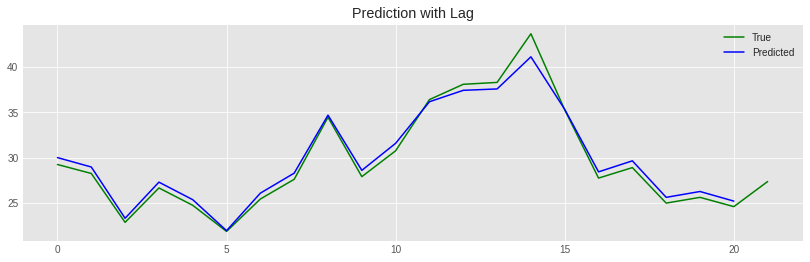

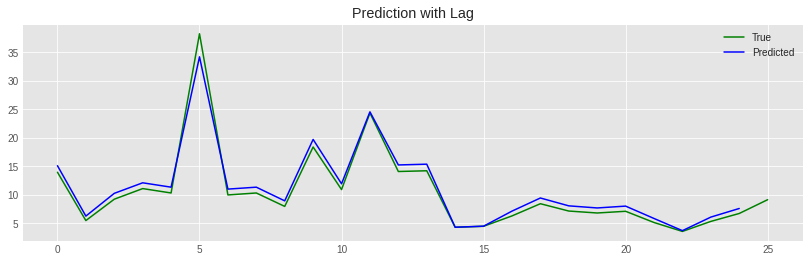

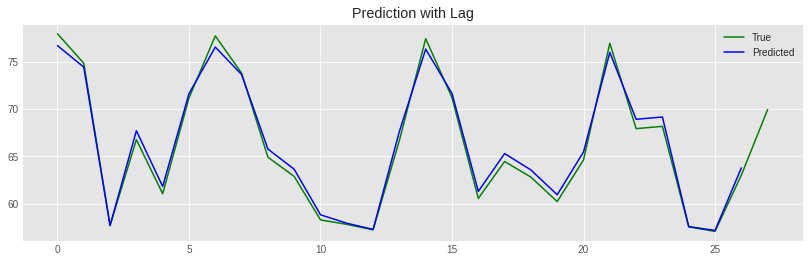

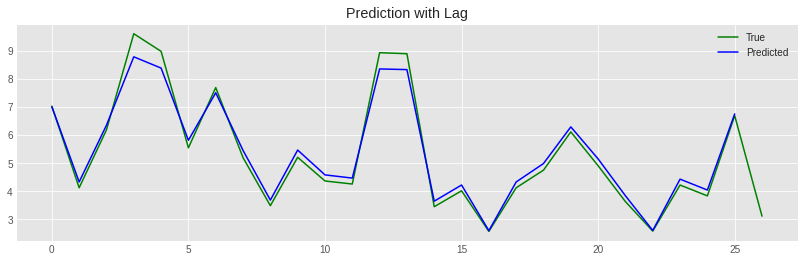

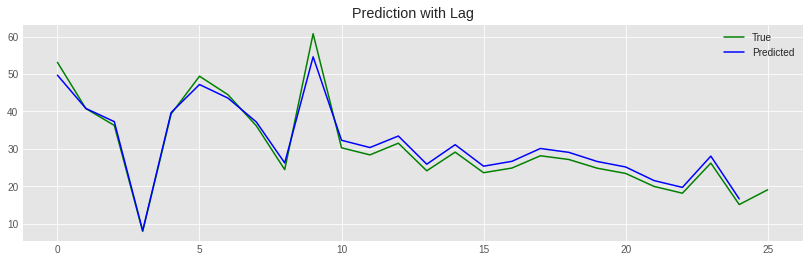

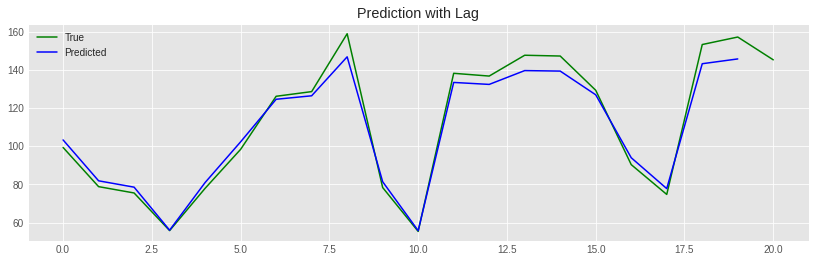

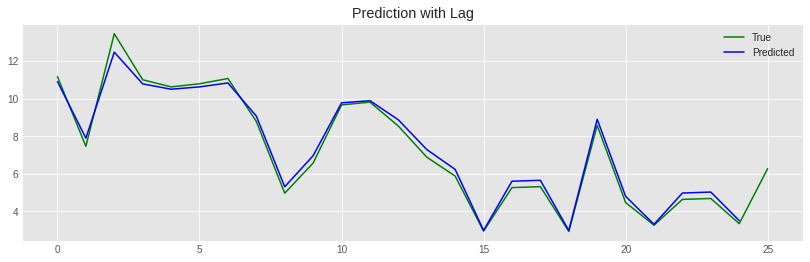

In [48]:
for country in training_countries:
    output = 0
    for (x,y) in enumerate(testset_cases[country]):
            data = y[0]
            target = y[1]
            NN_cases.zero_grad()
            output = NN_cases(data)
            output = output.detach().numpy()
    y_true = scaler_cases[country].inverse_transform(testset_cases_pre[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(output)
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
total_error["Cases"] = 0
for country in training_countries:
  total_error["Cases"] += lagging(pred_result_cases[country], -1)

MSE with Lag    : 0.0013297215
MSE with Lag    : 0.19892545
MSE with Lag    : 0.3519046
MSE with Lag    : 0.0010720264
MSE with Lag    : 0.115998134
MSE with Lag    : 0.0028829698
MSE with Lag    : 0.05341992


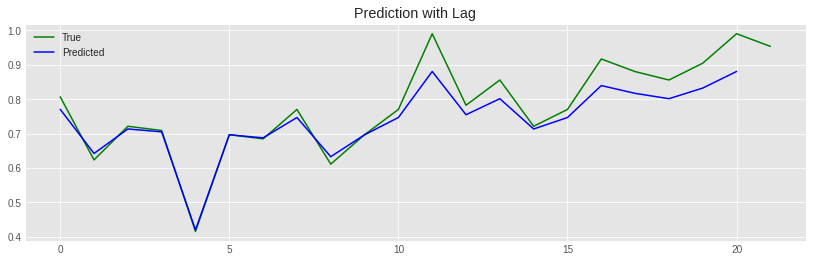

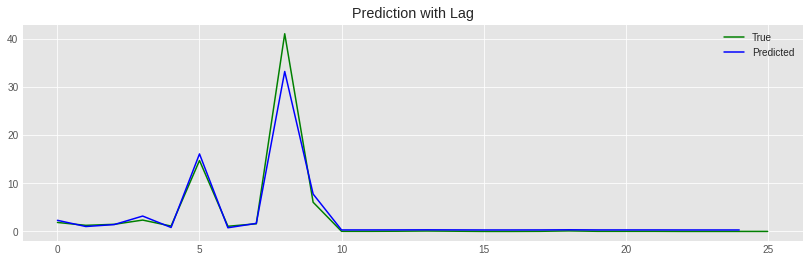

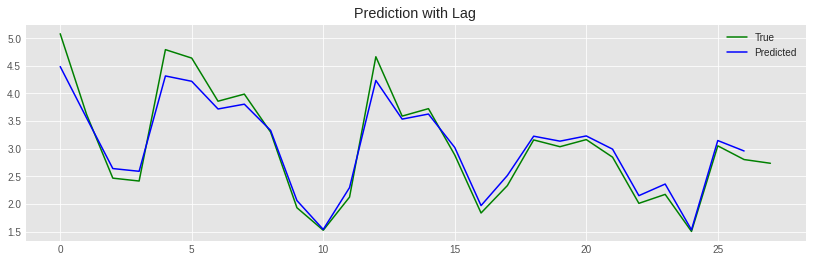

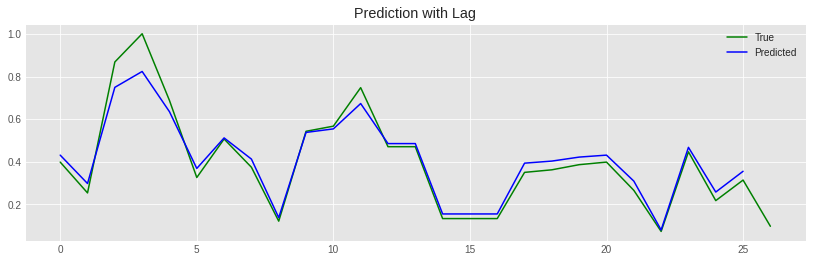

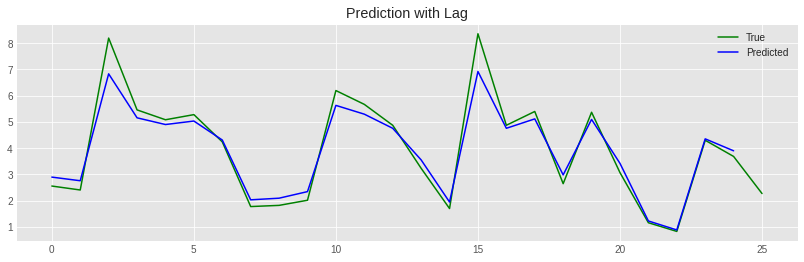

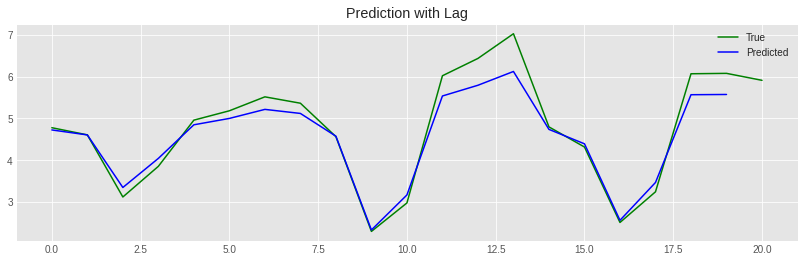

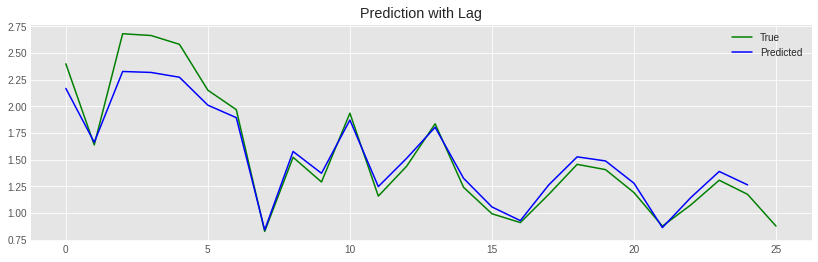

In [49]:
for country in training_countries:
    output = 0
    for (x,y) in enumerate(testset_deaths[country]):
            data = y[0]
            target = y[1]
            NN_deaths.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
            output = NN_deaths(data)
            output = output.detach().numpy()  # pass in the reshaped batch (recall they are 28x28 atm)
    y_true = scaler_deaths[country].inverse_transform(testset_deaths_pre[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(output)
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
total_error["Deaths"] = 0
for country in training_countries:
  total_error["Deaths"] += lagging(pred_result_deaths[country], -1)

In [50]:
print(total_error)

{'Cases': 30.92201559097157, 'Deaths': 0.725532824639231}
